In [38]:
import numpy as np 
import pathlib 
import h5py
import os
import datetime 
import pandas as pd
import warnings
import scipy
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
# import seaborn_image as isns
sns.set_theme()
import os 
import napari
import skimage.measure
import copy
import math
import natsort

import space
import plotting
import temporal
import utilities
import filehandling
import utilities
import unit_conversion
import contouring
import plotting
# qgrid.enable()
# import pandasgui
# import tabloo


# %matplotlib widget
# plt.ioff()
# test_path = r"D:\Igor analyses\230613\0_1_ColorSWN_200_0\2023-6-13_Testimport.h5"


In [2]:
%reload_ext autoreload
%autoreload 2

In [26]:
path = r"D:\Igor analyses\231107 rfs here\2023-11-7_MP_0_3_ColourSWN_200_.h5"
# path = r"C:\\Users\\Simen\\Downloads\\2023-6-13_'0_1_ColorSWN_200_0'.h5"
# path = r"D:\Igor analyses\230613\0_0_ColorSWN_200_0\2023-6-13_'0_0_ColorSWN_200_0'.h5"
loadfile = filehandling.load_strf_data(path)
temp = filehandling.load_from_hdf5(path)
# loaddata = filehandling.load_data(r"D:\Igor analyses\230613\0_0_ColorSWN_200_0\2023-6-13_'0_0_ColorSWN_200_0'.h5")

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_31356\3502760200.py:4: UserWarning: Rotation detected and corrected for D:\Igor analyses\231107 rfs here\2023-11-7_MP_0_3_ColourSWN_200_.h5
  loadfile = filehandling.load_strf_data(path)


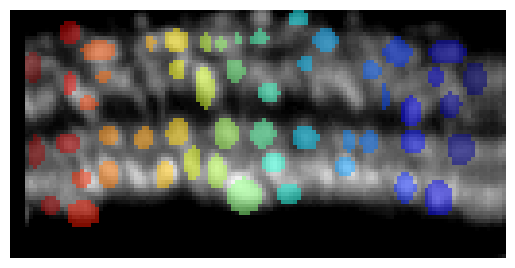

In [27]:
plotting.rois_overlay(loadfile)

In [39]:
plotting.chroma_overview(loadfile, 2, ipl_sort = True)

[autoreload of filehandling failed: Traceback (most recent call last):
  File "c:\Users\SimenLab\miniconda3\envs\strf_beta\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\SimenLab\miniconda3\envs\strf_beta\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "c:\Users\SimenLab\miniconda3\envs\strf_beta\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\filehandling.py", line 67
    

TypeError: 'int' object is not subscriptable

Error in callback <function _draw_all_if_interactive at 0x000002BBFFA776D0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002BBFFA76B00> (for post_execute):


KeyboardInterrupt: 

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\utilities.py:133: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\filehandling.py:145: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.contours_centres_by_pol, axis = 0)


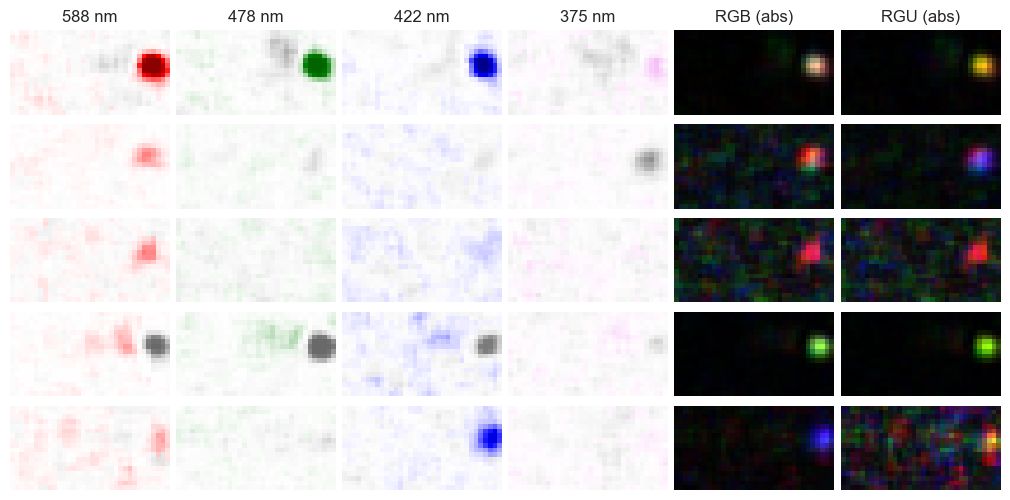

In [35]:
plotting.chroma_overview(loadfile, ipl_sort = False, num_rois = [-9, -10, -11, -12, -13])

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\utilities.py:133: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\filehandling.py:145: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.contours_centres_by_pol, axis = 0)


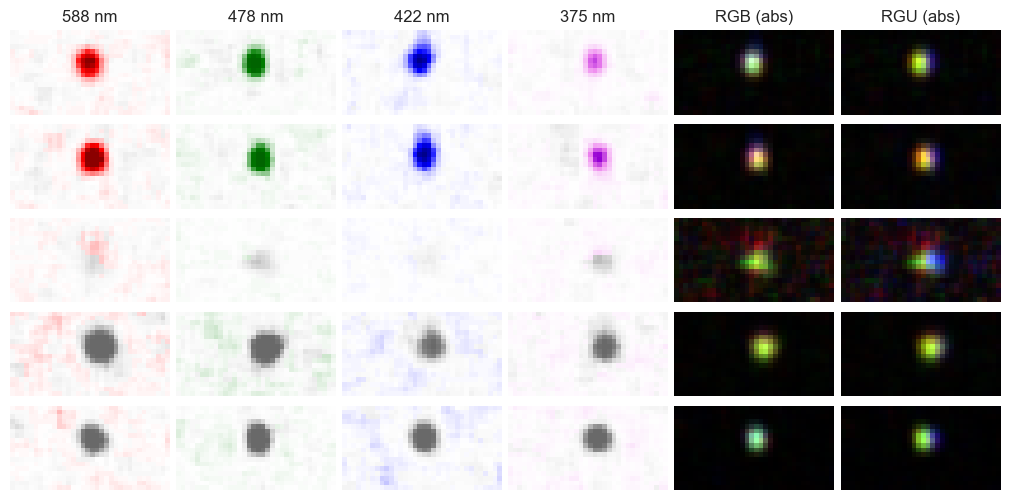

In [36]:
plotting.chroma_overview(loadfile, ipl_sort = True, num_rois = [-9, -10, -11, -12, -13])

In [10]:


# strfs_chroma = loadfile.collapse_times().reshape(4, 19, 24, 40, order = 'f')
# times_chroma = loadfile.timecourses.reshape(4, 19, 2, 20, order = 'f')
strfs_chroma = utilities.multicolour_reshape(loadfile.collapse_times(), 4)
times_chroma =  utilities.multicolour_reshape(loadfile.timecourses, 4)
strfs_rgb = np.abs(np.rollaxis((np.delete(strfs_chroma, 3, 0)), 0, 4))
strfs_rgb = np.array([utilities.min_max_norm(i, 0, 1) for i in strfs_rgb])
strfs_rgu = np.abs(np.rollaxis((np.delete(strfs_chroma, 2, 0)), 0, 4))
strfs_rgu = np.array([utilities.min_max_norm(i, 0, 1) for i in strfs_rgu]);
colours = ['r', 'g', 'b', 'violet'];

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 4.858637560212484)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 13.601233544682367)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 26.659195598107697)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 17.280706000120922

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Lower contour did not pass arithmetic threshold criteria (half abs-max = 2.164603710788065)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Lower contour did not pass arithmetic threshold criteria (half abs-max = 2.048971428246694)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Lower contour did not pass arithmetic threshold criteria (half abs-max = 17.78736677571082)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Lower contour did not pass arithmetic threshold criteria (half abs-max = 10.110173676257793)


(-6.0, 6.0)

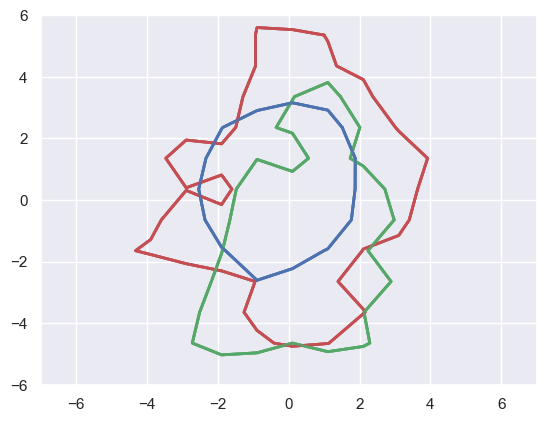

In [95]:
roi = 18 #rois = [1, 4, 9, 18]

colours = ['r', 'g', 'b', 'violet']

mean_uv_offset = loadfile.calc_LED_offset()

# ROI average
roi_centre = np.nanmean(utilities.multicolour_reshape(loadfile.contours_centres, 4), axis = 0)[roi]
chroma_contours = np.copy(utilities.multicolour_reshape(loadfile.contours, 4)) 
# Get the contours for the current ROI 
inset_contours = np.copy(chroma_contours[:, roi])
temp_contours_down = np.array(inset_contours, dtype = 'object')[:, 0] # - roi_centre
temp_contours_up = np.array(inset_contours, dtype = 'object')[:, 1]# - roi_centre
# Inset UV
for i in temp_contours_up[3]:
    i += + mean_uv_offset
for i in temp_contours_down[3]:
    i += + mean_uv_offset

#Plotting w/ shift relative centre 
for num, contour_up_colours in enumerate(temp_contours_up):
    for contour_up in contour_up_colours: #+ roi_offsets[roi]:
        plt.plot(contour_up[:, 1] - roi_centre[1], contour_up[:, 0] - roi_centre[0], lw = 2, c = colours[num], alpha = .75)# contour
        # plt.fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'cyan',alpha = 0.25)
    for num, contour_down_colours in enumerate(temp_contours_down):
        for contour_down in contour_down_colours:# + roi_offsets[roi]:
            plt.plot(contour_down[:, 1] - roi_centre[1], contour_down[:, 0] - roi_centre[0], lw = 2, c = colours[num], alpha = .75)# contour
# Idk why its chanaging the underlying data but this is a lazy fix 
for i in temp_contours_up[3]:
    i -= + mean_uv_offset
for i in temp_contours_down[3]:
    i -= + mean_uv_offset
plt.xlim(-7, 7)
plt.ylim(-6, 6)
# plt.scatter(roi_centre[1], roi_centre[0], marker = "x")
# print(roi_offsets[roi])
# name_str = rf"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\ROI{roi}_contours.svg"
# plt.savefig(name_str)

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\utilities.py:133: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")


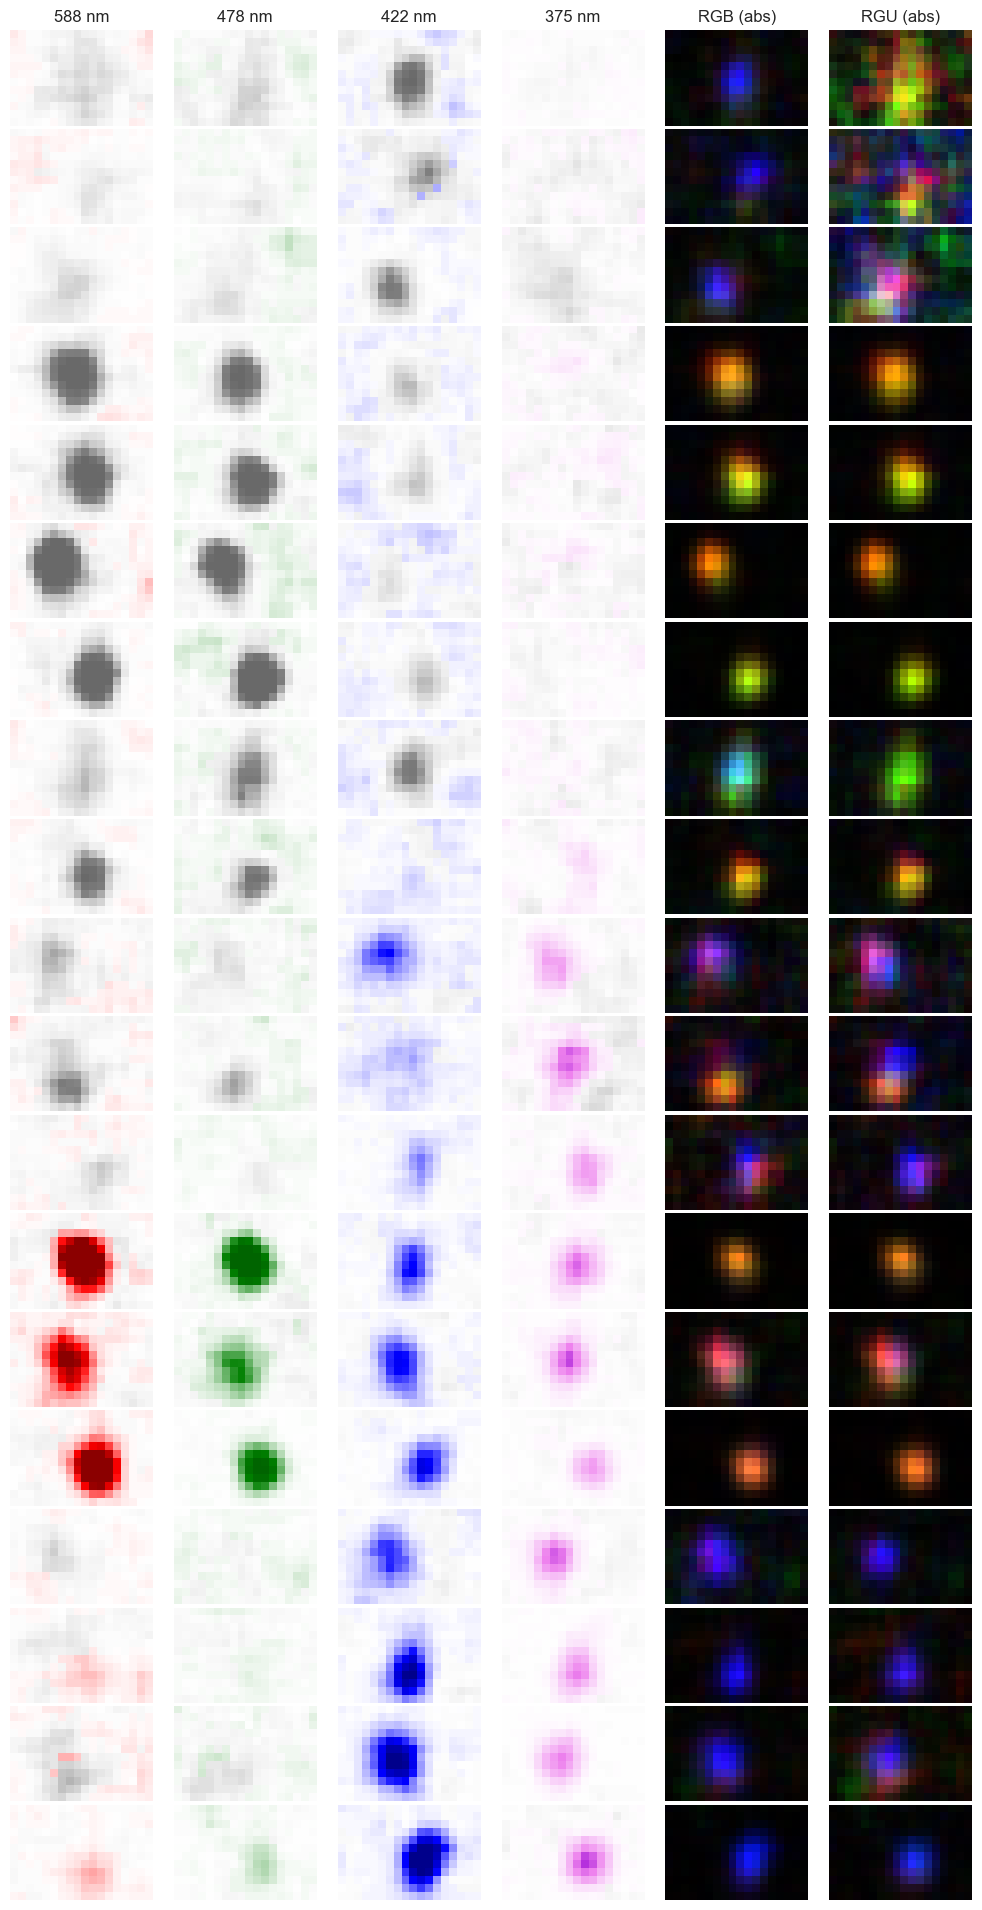

In [4]:
strfs_chroma = utilities.multicolour_reshape(loadfile.collapse_times(), 4)
num_rois = len(strfs_chroma[0, :])
polarities = utilities.multicolour_reshape(loadfile.polarities(), 4)
red_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgrey", "grey", "white","red","darkred"])
green_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgrey", "grey","white","green","darkgreen"])
blue_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgrey", "grey","white","blue","darkblue"])
violet_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgrey", "grey","white","violet","darkviolet"])

#colours = ["r", "g", "b", "violet"]
fig, ax = plt.subplots(num_rois, 6, figsize = (10, num_rois))
colour_maps = [red_map, green_map, blue_map, violet_map]


# for (roi, row) in reverse(range(num_rois,)):
for roi in range(num_rois):
    # print(roi)
    spaces = np.copy(utilities.auto_remove_border(strfs_chroma[:, roi])) # this works
    spaces[3] = np.roll(spaces[3], np.round(loadfile.calc_LED_offset(), 0).astype("int"), axis =(0,1))
    spaces = spaces[:, :12, 8:26]
    times = times_chroma[:, roi]
    r, g, b, uv = spaces[0], spaces[1], spaces[2], spaces[3]
    rgb = np.abs(np.array([r,g,b]))
    rgu = np.abs(np.array([r,g,uv]))
    processed_rgb = np.rollaxis(utilities.min_max_norm(rgb, 0, 1), axis = 0, start = 3)
    processed_rgu = np.rollaxis(utilities.min_max_norm(rgu, 0, 1), axis = 0, start = 3)
    rgb_plot = ax[-roi-1, 4].imshow(processed_rgb, origin = "lower", interpolation = "none")
    rgb_plot = ax[-roi-1, 5].imshow(processed_rgu, origin = "lower", interpolation = "none")
    for i in range(4):
        strf = ax[-roi-1, i].imshow(spaces[i], cmap = colour_maps[i], origin = "lower")
        strf.set_clim(-25, 25)
        if roi == 0:
            labels = ["588 nm", "478 nm", "422 nm", "375 nm", "RGB (abs)", "RGU (abs)"]#, "Timecourses"]
            for j in range(6):
                ax[-roi, j].set_title(labels[j])
    desired_aspect = np.abs(np.diff(ax[roi, 0].get_ylim())[0] / np.diff(ax[0,0].get_xlim())[0])
    # for n, i in enumerate(times[:, 0]):
    #     ax[roi, 6].plot(i, c = colours[n])
    # for n, i in enumerate(times[:, 1]):
    #     ax[roi, 6].plot(i, c = colours[n])
    # ax[roi, 6].set_aspect(desired_aspect)
for axis in ax.flat:
    axis.axis(False)
fig.tight_layout(pad = 0.3, h_pad = .2, w_pad=.4)
# fig.tight_layout()
#fig.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\STRF_overview.svg")

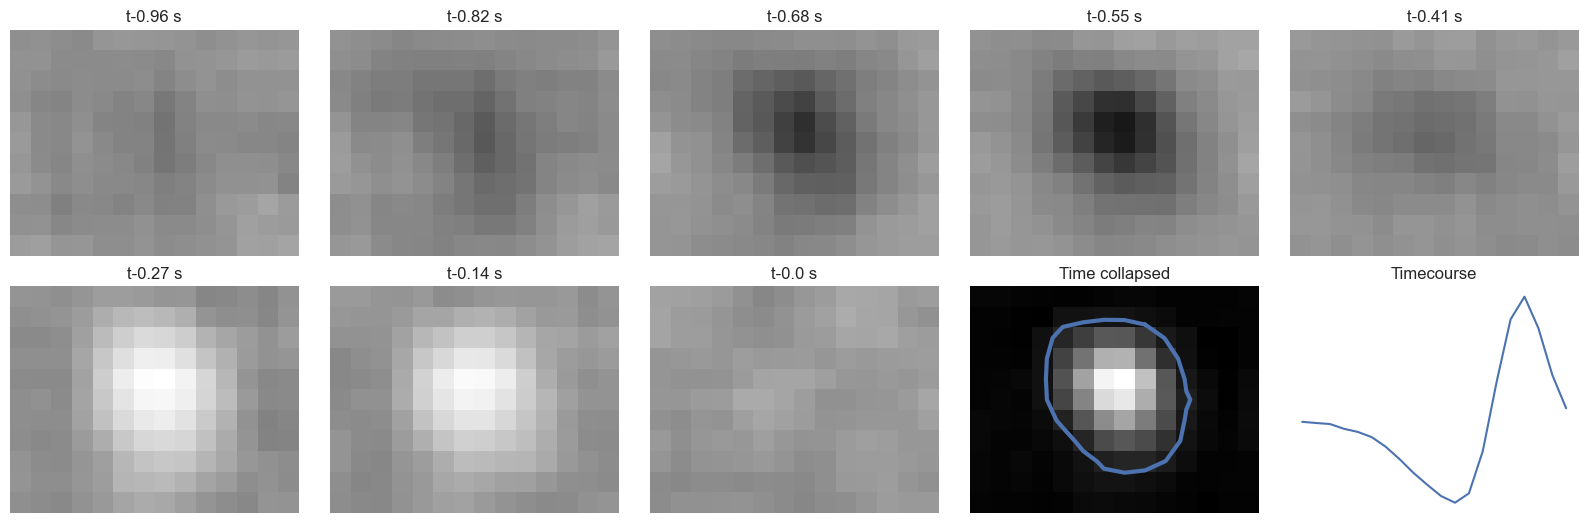

In [100]:
rois = [1, 4, 9, 18] #1, 18, 10
fig, ax = plt.subplots(2, 5, figsize = (16, 5))
roi = 6
colour = 0
temp_arr = utilities.multicolour_reshape(loadfile.strfs, 4)[colour, roi][5::2][:, 3:14, 13:27]
max_abs = np.max(np.abs(temp_arr))
time_steps = np.round(np.linspace(1.3, 0, 20)[5::2], 2)
for n, i in enumerate(temp_arr):
    imshow = ax.flat[n].imshow(i, origin = "lower", cmap = "Greys_r")
    imshow.set_clim(-max_abs, max_abs)
    ax.flat[n].axis("off")
    ax.flat[n].set_title(f"t-{time_steps[n]} s")

demo_arr = strfs_chroma[colour, roi][3:14, 13:27]
ax.flat[8].imshow(demo_arr, origin = "lower", cmap = "Greys_r")
temp_contour = contouring.contour(demo_arr, level = (-8, 8))
lower, upper = temp_contour
for i in upper:
    ax.flat[8].plot(i[:, 1], i[:, 0], lw = 3)
ax.flat[8].axis("off")
ax.flat[8].set_title("Time collapsed")
# ax[9].imshow(demo_arr, alpha = .1, origin = "lower")
ax.flat[9].axis("off")
ax.flat[9].plot(utilities.multicolour_reshape(loadfile.timecourses, 4)[colour, roi][1])
ax.flat[9].set_title("Timecourse")
ax.flat[9].set_aspect(0.6)

fig.tight_layout(pad = 0, h_pad = 1, w_pad=0)

fig.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\example_timecollapse.svg")

In [139]:
inset_contours

array([[array([array([[ 7.        , 19.5427654 ],
                      [ 6.80405101, 20.        ],
                      [ 6.06250077, 21.        ],
                      [ 6.        , 21.21517407],
                      [ 5.        , 21.00510862],
                      [ 4.99666914, 21.        ],
                      [ 4.32814916, 20.        ],
                      [ 4.        , 19.57481441],
                      [ 3.37467225, 19.        ],
                      [ 3.20242017, 18.        ],
                      [ 3.        , 17.66261473],
                      [ 2.72308071, 17.        ],
                      [ 2.84785804, 16.        ],
                      [ 3.        , 15.65099677],
                      [ 4.        , 15.39468205],
                      [ 5.        , 15.7878251 ],
                      [ 5.05180328, 16.        ],
                      [ 6.        , 16.4982142 ],
                      [ 7.        , 16.2434293 ],
                      [ 7.31091578, 17.        ],


In [108]:
40 / 86.25 * 5

2.318840579710145

In [106]:
loadfile.strfs.shape

(76, 20, 24, 40)

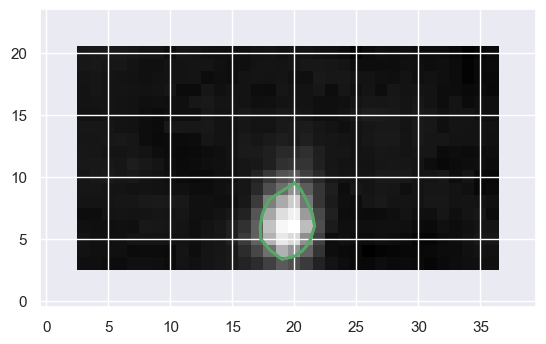

In [4]:
roi = 2
colour = 2
contours = np.copy(utilities.multicolour_reshape(loadfile.contours, 4))
# contours[3] = contours[3] + UV_offset
plt.imshow(strfs_chroma[colour, roi], cmap = "Greys_r", origin = "lower")
curr_contours = contours[colour, roi]
all_ups = np.array(curr_contours, dtype = 'object')
all_downs = np.array(curr_contours, dtype = 'object')
for num, contour_up_colours in enumerate(all_ups):
    for contour_up in contour_up_colours:
        contour_up = contour_up #- differences[roi]
        plt.plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = colours[num], alpha = 1)# contour
        # ax.flat[n].fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'cyan',alpha = 0.5)
for num, contour_down_colours in enumerate(all_downs):
    for contour_down in contour_down_colours:
        contour_down = contour_down #- differences[roi]
        plt.plot(contour_down[:, 1], contour_down[:, 0], lw = 2, c = colours[num], alpha = 1)# contour

In [3]:
np.asarray([], dtype="object")

array([], dtype=object)

In [4]:
loadfile.calc_LED_offset()

array([-0.71756396, -1.41415251])

c:\Users\SimenLab\miniconda3\envs\strf_beta\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\SimenLab\miniconda3\envs\strf_beta\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\filehandling.py:147: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.contours_centres_by_pol, axis = 0)


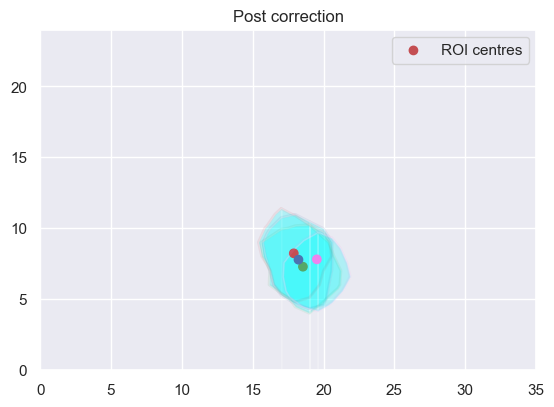

In [5]:
fig, ax = plt.subplots(1)
roi = 5
contours = np.copy(loadfile.contours[roi*4:roi*4+4])
contours[3] = contours[3] + loadfile.calc_LED_offset()

# off_centers = loadfile.contours_centres[0][roi*4:roi*4+4]
# on_centers = loadfile.contours_centres[1][roi*4:roi*4+4]
avg_centres = np.copy(utilities.multicolour_reshape(loadfile.contours_centres, 4)[:, roi])
avg_centres[3] = avg_centres[3] + loadfile.calc_LED_offset()
for num, contour_up_colours in enumerate(np.array(contours, dtype = 'object')[:, 1]):
    for contour_up in contour_up_colours:
        ax.plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = colours[num], alpha = .1)# contour
        ax.fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'cyan',alpha = 0.25)
for num, contour_down_colours in enumerate(np.array(contours, dtype = 'object')[:, 0]):
    for contour_down in contour_down_colours:
        ax.plot(contour_down[:, 1], contour_down[:, 0], lw = 2, c = colours[num], alpha = .1)# contour
        ax.fill_between(contour_down[:, 1].astype("float"), contour_down[:, 0].astype("float"), facecolor = 'yellow', alpha = 0.25)
ax.scatter(avg_centres[:, 1], avg_centres[:, 0], c = ['r', 'g', 'b', 'violet'], label = "ROI centres")
plt.xlim(0, 35)
plt.ylim(0, 24)

# plt.scatter(avg_reference_pos[1], avg_reference_pos[0], c = 'yellow', marker = "x")
# plt.scatter(avg_compare_pos[1], avg_compare_pos[0], c = 'cyan', marker = "x")

from skimage import exposure
# plt.imshow(exposure.adjust_gamma(strfs_rgb[roi], .6), origin = "lower", cmap = "Greys", vmin = 200)
# plt.imshow(strfs_rgb[roi], origin = "lower", cmap = "Greys")
plt.gca().set_aspect('equal')
plt.title("Post correction")
plt.legend()

c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\filehandling.py:147: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.contours_centres_by_pol, axis = 0)


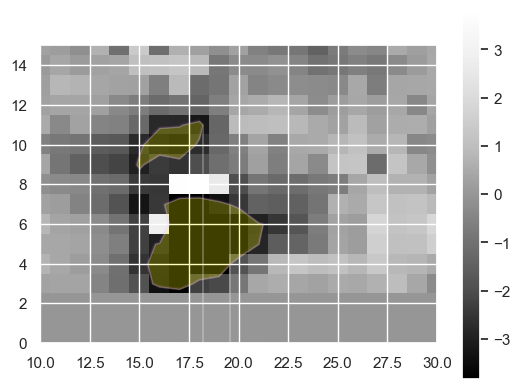

In [520]:
fig, ax = plt.subplots(1)
roi = 1
colour = 0
contours = np.copy(loadfile.contours[roi*4:roi*4+4])
contours[3] = contours[3] + loadfile.calc_LED_offset()
spaces = np.copy(strfs_chroma[:, roi]) # this works
spaces[3] = np.roll(spaces[3], np.round(loadfile.calc_LED_offset(), 0).astype("int"), axis =(1,0))

# for num, contour_up_colours in enumerate(np.array(contours, dtype = 'object')[:, 1]):
for contour_up in contours[colour][1]:
    ax.plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = colours[num], alpha = .1)# contour
    ax.fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'cyan',alpha = 0.25)
# for num, contour_down_colours in enumerate(np.array(contours, dtype = 'object')[:, 0]):
for contour_down in contours[colour][0]:
    ax.plot(contour_down[:, 1], contour_down[:, 0], lw = 2, c = colours[num], alpha = .1)# contour
    ax.fill_between(contour_down[:, 1].astype("float"), contour_down[:, 0].astype("float"), facecolor = 'yellow', alpha = 0.25)
# ax.scatter(avg_centres[:, 1], avg_centres[:, 0], c = ['r', 'g', 'b', 'violet'], label = "ROI centres")

# plt.imshow(exposure.adjust_gamma(strfs_rgb[roi], .6), origin = "lower", cmap = "Greys", vmin = 200)
plt.imshow(spaces[colour], cmap = "Greys_r", origin = "lower")
abs_max = np.max(np.max(spaces[colour]))
plt.clim(-abs_max, abs_max)
plt.xlim(10, 30)
plt.ylim(0, 15)
plt.colorbar()

In [109]:
plotting.play_movie(temp_arr)

In [563]:
times_chroma.shape

(4, 19, 2, 20)

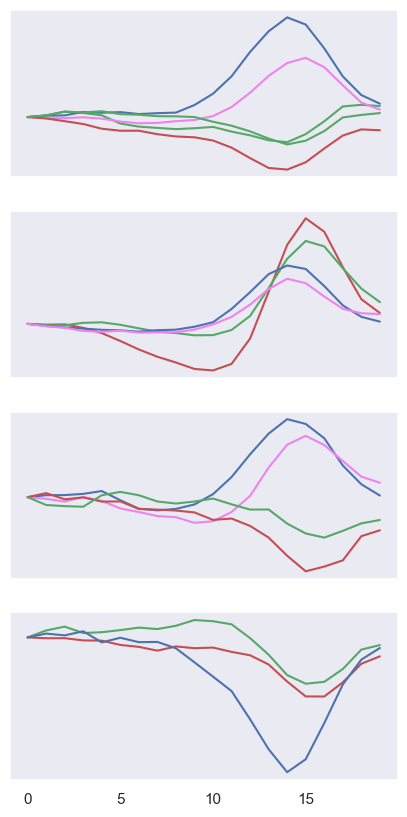

In [581]:
fig, ax = plt.subplots(4, figsize = (5, 10), sharex = True)
rois = [1, 4, 9, 18] #1, 18, 10
colours = ["r", "g", "b", "violet"]
for n, roi in enumerate(rois):
    curr_times = times_chroma[:, roi]
    for m, i in enumerate(curr_times[:, 1]):
        ax[n].plot(i, c = colours[m])
    for m, i in enumerate(curr_times[:, 0]):
        ax[n].plot(i, c = colours[m])
    ax[n].yaxis.set_visible(False)
    ax[n].grid(False)
# fig.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\ROIexample_timecourses.svg")

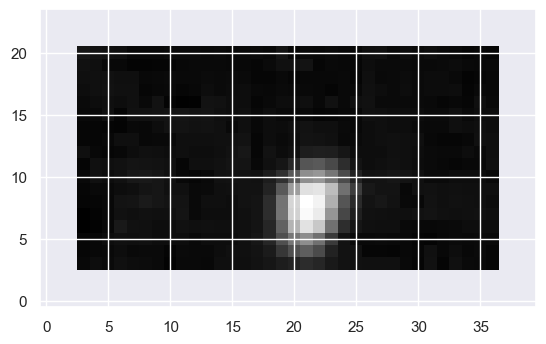

In [532]:
plt.imshow(loadfile.collapse_times()[2], origin = "lower", cmap = "Greys_r")

In [18]:
temp.wDataCh0_detrended

(128, 64, 50000)

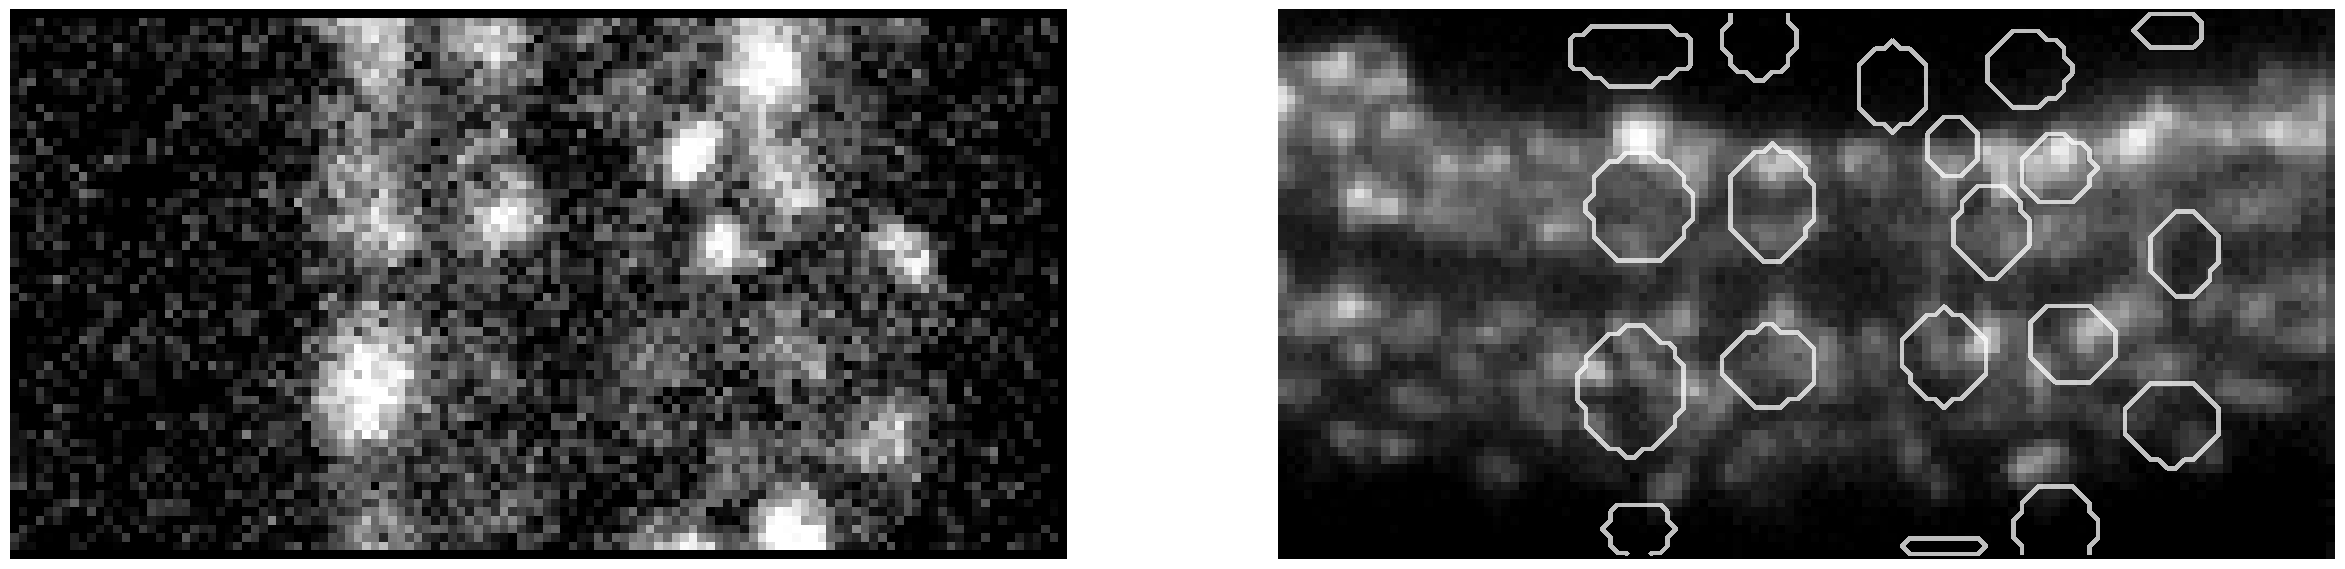

In [92]:
temp = filehandling.load_from_hdf5(path)
fig, ax = plt.subplots(1,2, figsize = (30, 15))
corr=ax[0].imshow(temp.correlation_projection.T[:, 5:], cmap = 'Greys_r', interpolation = "none")
# fig.colorbar(corr, ax = ax[0])
corr.set_clim(0, 0.015)
ipl = ax[1].imshow(utilities.min_max_norm(np.mean(loadfile.images, axis = 0)[:, 5:], 0, 1), cmap = 'Greys_r', interpolation = "none")
# ax[1].imshow(np.ma.masked_values(temp.ROIs.T[:, 5:], 1), cmap = 'Set3', alpha = 0.6)
ipl.set_clim(.05, .95)
ax[1].contour(temp.ROIs.T[:, 5:], 0, colors = 'white', alpha = 0.75, linewidths = 2.5, antialiased=False)
for i in ax:
    i.grid(False)
    i.set_axis_off()
# fig.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\Scanplane_overview.svg")

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_13620\764028578.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(labels)


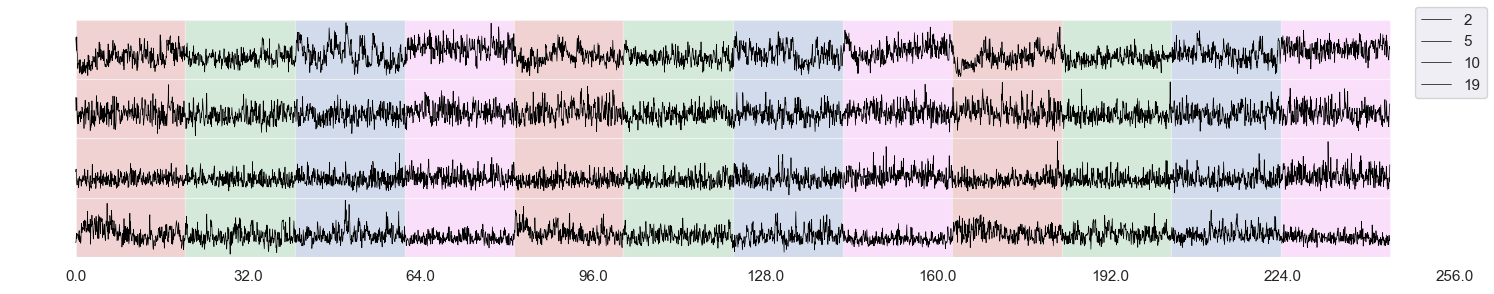

In [4]:
start_loop_nr = 2
num_loops = 3
start, stop = temp.Triggertimes_Frame[400 * start_loop_nr].astype("int"), temp.Triggertimes_Frame[400 * start_loop_nr + 400 * num_loops].astype("int")
arr = temp.Traces0_raw[start:stop]
rois = [1, 4, 9, 18] #1, 18, 10
mode = 4

fig, ax = plt.subplots(len(rois), figsize = (15, 3), sharex=True)
phase_period = np.ceil(len(arr)/num_loops/mode).astype("int")
for roi, axis in zip(rois, ax):
    time_arr = np.take(arr, roi, axis = 1) # [11000:12000]
    axis.plot(time_arr, label = roi + 1, c = 'black', lw = 0.5) # 9
    for i in range(num_loops):
        axis.axvspan(phase_period*0 + (len(arr)*i/num_loops), phase_period*1 + (len(arr)*i/num_loops), facecolor="r", alpha = 0.25)
        axis.axvspan(phase_period*1 + (len(arr)*i/num_loops), phase_period*2 + (len(arr)*i/num_loops), facecolor="g", alpha = 0.25)
        axis.axvspan(phase_period*2 + (len(arr)*i/num_loops), phase_period*3 + (len(arr)*i/num_loops), facecolor="b", alpha = 0.25)
        axis.axvspan(phase_period*3 + (len(arr)*i/num_loops), phase_period*4 + (len(arr)*i/num_loops), facecolor="violet", alpha = 0.25)
    axis.set_yticklabels([])
    axis.grid(False)
    axis.set(frame_on=False)
    labels = axis.get_xticks() / 15.625
    axis.set_xticklabels(labels)
    # axis.ticklabel_format()
fig.legend()
fig.tight_layout()
fig.subplots_adjust(hspace = 0) 

# fig.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\traceexample.svg")

In [8]:
time_arr

array([55803.38, 55816.8 , 55873.06, ..., 55857.5 , 55818.3 , 55825.3 ],
      dtype=float32)

In [13]:
1.3/13

0.1

''

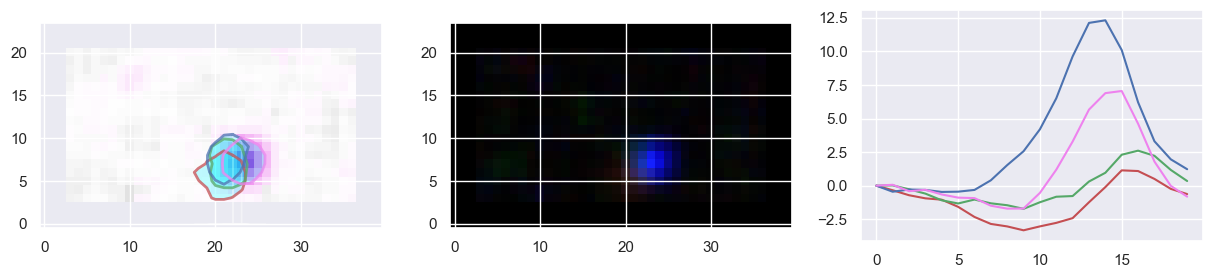

In [162]:
roi = 0#8
contours = loadfile.contours[roi*4:roi*4+4]
rfs2d = [utilities.min_max_norm(i, 0, 1) if np.max(np.abs(i)) > 4 else i * 0 for i in loadfile.collapse_times()[roi*4:roi*4+4]]
"""Need to figure out how to automate the reshape"""
times = times_chroma[:, roi]
spaces = strfs_chroma[:, roi] # this works

r, g, b, uv = spaces[0], spaces[1], spaces[2], spaces[3]

fig, ax = plt.subplots(1, 3, figsize = (15, 3))
a = ax[1].imshow(strfs_rgu[roi], origin = "lower")
b = ax[0].imshow(uv, cmap = violet_map, origin = "lower")
abs_max = np.max(np.abs(uv))
# a.set_clim(-abs_max, abs_max)
b.set_clim(-abs_max, abs_max)
colours = ['r', 'g', 'b', 'violet']
for num, contour_up_colours in enumerate(np.array(contours, dtype = 'object')[:, 1]):
    for contour_up in contour_up_colours:
        ax[0].plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = colours[num], alpha = .75)# contour
        ax[0].fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'cyan',alpha = 0.25)
for num, contour_down_colours in enumerate(np.array(contours, dtype = 'object')[:, 0]):
    for contour_down in contour_down_colours:
        ax[0].plot(contour_down[:, 1], contour_down[:, 0], lw = 2, c = colours[num], alpha = .75)# contour
        ax[0].fill_between(contour_down[:, 1].astype("float"), contour_down[:, 0].astype("float"), facecolor = 'yellow', alpha = 0.25)
for n, i in enumerate(times[:, 1]):
    ax[2].plot(i, c = colours[n])
for n, i in enumerate(times[:, 0]):
    ax[2].plot(i, c = colours[n])

;

In [30]:
plotting.play_movie(loadfile.strfs[roi*4:roi*4+4][2])

In [ ]:
plt.plot(np.loadfile.strfs[roi*4:roi*4+4][2])

In [60]:
np.repeat(np.expand_dims(r.mask, 0), 3, axis = 0).shape

(3, 24, 40)

Text(0.5, 1.0, 'ONs')

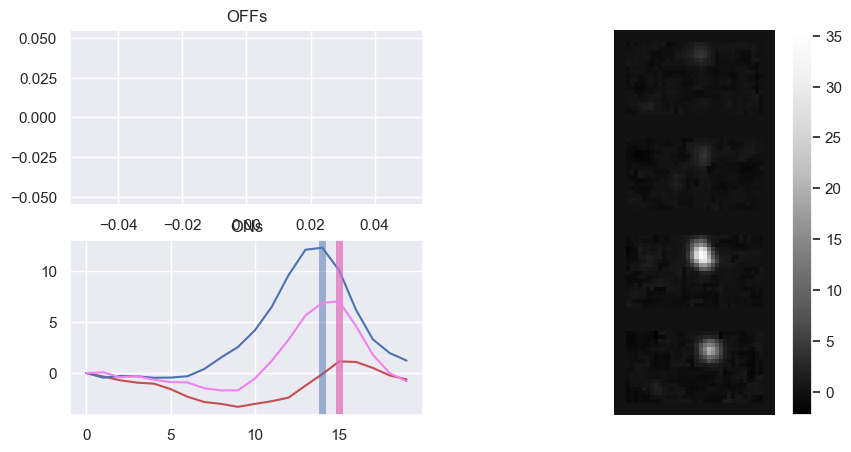

In [11]:
roi = 0 #8
contours = loadfile.contours[roi*4:roi*4+4]
"""Need to figure out how to automate the reshape"""
times = loadfile.timecourses.reshape(4, 19, 2, 20, order = 'f')[:, roi]
spaces = loadfile.collapse_times().reshape(4, 19, 24, 40, order = 'f')[:, roi] # this works

fig, ax = plt.subplot_mosaic([[0, 2], [1, 2]], figsize = (10, 5))
colours = ["r", "g", "b", "violet"]
for n, i in enumerate(times[:, 0]):
    min_time = np.argmin(i)
    if min_time > 0:
        ax[0].axvline(min_time, c = colours[n], lw = 5, alpha = 0.5)
    ax[0].plot(i.T, color = colours[n])
for m, j in enumerate(times[:, 1]):
    max_time = np.argmax(j)
    if max_time > 0:
        ax[1].axvline(max_time, c = colours[m], lw = 5, alpha = 0.5)
    ax[1].plot(j.T, color = colours[m])
summary = ax[2].imshow(np.concatenate(spaces), cmap = 'Greys_r')
ax[2].axis('off')
fig.colorbar(summary, ax=ax[2])
;
ax[0].set_title("OFFs")
ax[1].set_title("ONs")


''

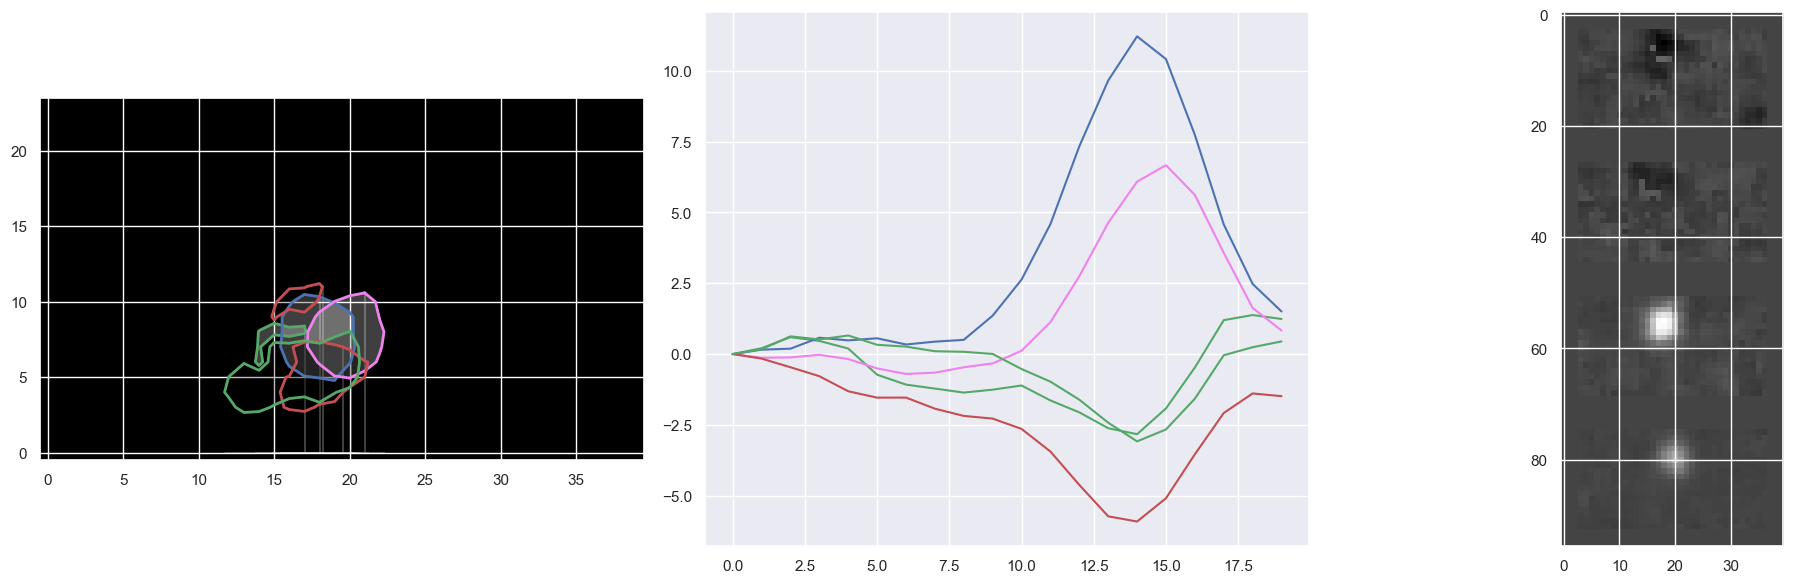

In [40]:
roi =1 #8
contours = loadfile.contours[roi*4:roi*4+4]
rfs2d = [utilities.min_max_norm(i, 0, 1) if np.max(np.abs(i)) > 4 else i * 0 for i in loadfile.collapse_times()[roi*4:roi*4+4]]
times = loadfile.timecourses.reshape(4, 19, 2, 20, order = 'f')
spaces = loadfile.collapse_times().reshape(4, 19, 24, 40, order = 'f') # this works
# plt.imshow(np.sum(rfs2d, axis=0), cmap='Greys')
#plt.imshow(, cmap='Greys')
# rgb = utilities.min_max_norm(np.dstack((rfs2d[1],rfs2d[2],rfs2d[3])), 0, 1)
# plt.imshow(rgb*0)
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax[0].imshow(np.zeros(loadfile.strfs[0, 0].shape), cmap = "bone", origin = "lower")
colours = ['r', 'g', 'b', 'violet']
for num, contour_up_colours in enumerate(np.array(contours, dtype = 'object')[:, 1]):
    for contour_up in contour_up_colours:
        ax[0].plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = colours[num], alpha = 1)# contour
        ax[0].fill_between(contour_up[:, 1].astype("float"), contour_up[:, 0].astype("float"), facecolor = 'white',alpha = 0.25)
for num, contour_down_colours in enumerate(np.array(contours, dtype = 'object')[:, 0]):
    for contour_down in contour_down_colours:
        ax[0].plot(contour_down[:, 1], contour_down[:, 0], lw = 2, c = colours[num], alpha = 1)# contour
        ax[0].fill_between(contour_down[:, 1].astype("float"), contour_down[:, 0].astype("float"), facecolor = 'black', alpha = 0.25)
for n, i in enumerate(times[:, roi, 1]):
    ax[1].plot(i, c = colours[n])
for n, i in enumerate(times[:, roi, 0]):
    ax[1].plot(i, c = colours[n])
summary = ax[2].imshow(np.concatenate(spaces[:, roi]), cmap = 'Greys_r')
fig.tight_layout()
;

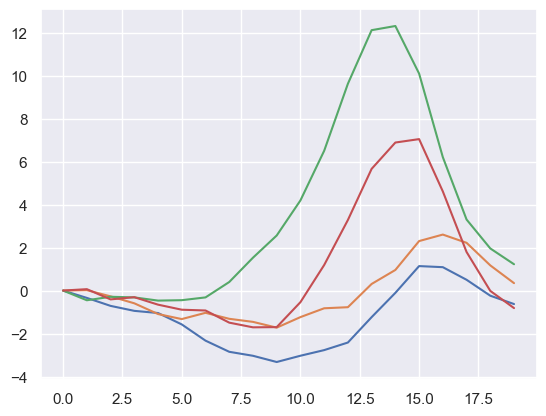

In [8]:
import signal_analysis
# signal_analysis.bootstrap_space(spaces[:, roi][3])
signal_analysis.bootstrap_space(loadfile.strfs[15])

0.0

In [ ]:
 rng.permuted(rng.permuted(org_arr, axis = 2), axis = 1)

In [4]:
preprocess = utilities.min_max_norm(np.std(loadfile.images, axis = 0), 0, 255)
# preprocess = utilities.min_max_norm(space._legacy_corr_spacetime(loaddata.images))
plt.imshow(preprocess, origin = "lower", cmap = "Greys_r",
    vmin = 150, vmax = 255)
plt.imshow(np.ma.masked_where(loadfile.rois.T == 1, loadfile.rois.T), cmap = "jet", alpha = 0.5, origin = "lower")
# plt.axis("off")
# plt.savefig(r"C:\Users\Simen\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\ROI_image.svg")

IndexError: index 128 is out of bounds for axis 2 with size 128

In [232]:
.shape

(50000, 128, 64)

In [233]:
loaddata.images.shape

(50000, 64, 128)

In [224]:
loadfile.strfs[0].shape

(20, 24, 40)

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(utilities.min_max_norm(np.diff(all_data.Traces0_raw[2850:2950, 1]), 0, 1))
plt.plot(utilities.min_max_norm(all_data.Traces0_raw[2850:2950, 1], 0, 1))
# plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\trace_example.svg")

In [ ]:
loadfile = filehandling.load_strf_data(r"D:\Igor analyses\230502\2023-5-2_SMP_0_0_SWN_UV_100_0.h5")


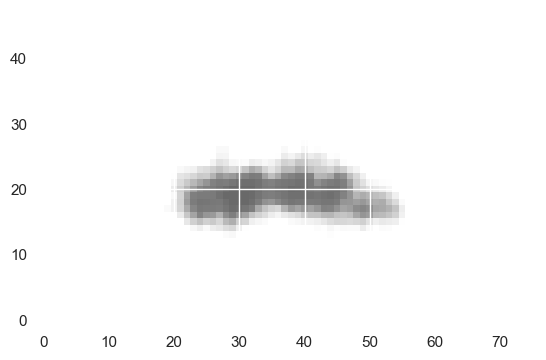

In [90]:
absolute_version = np.abs(loadfile.collapse_times()).data
indeces_to_delete = np.unique(np.where(np.max(absolute_version, axis = (1,2)) < 5)[0]) # filtering criteria based on amplitudes
cleaned_version = np.delete(loadfile.collapse_times(), indeces_to_delete, axis = 0)

grey_map = matplotlib.colors.LinearSegmentedColormap.from_list("", [ "white", "grey","dimgrey"])
plt.imshow(np.std(absolute_version, axis = 0), origin = "lower", cmap = grey_map, vmin =1, vmax=10)
#plt.clim(2, 30)

plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\ERM 2023\intro_contours_ONOFF_max_2_SMP_0_0_SWN_UV_100_0.svg")

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_5576\418700777.py:2: UserWarning: Rotation detected and corrected for D:\Igor analyses\230502\2023-5-2_SMP_0_0_SWN_UV_100_0.h5
  loadfile = filehandling.load_strf_data(r"D:\Igor analyses\230502\2023-5-2_SMP_0_0_SWN_UV_100_0.h5")


(41, 48, 76)
41


c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Lower contour did not pass arithmetic threshold criteria (half abs-max = 17.308234815125505)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 13.824280353768202)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 16.536306176776197)
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\RF_analysis\contouring.py:178: UserWarning: Upper contour did not pass arithmetic threshold criteria (half abs-max = 18.69234162055591

Text(0.5, 0.98, 'Min and max projection of RF rec with offsets (colour not controlled for)')

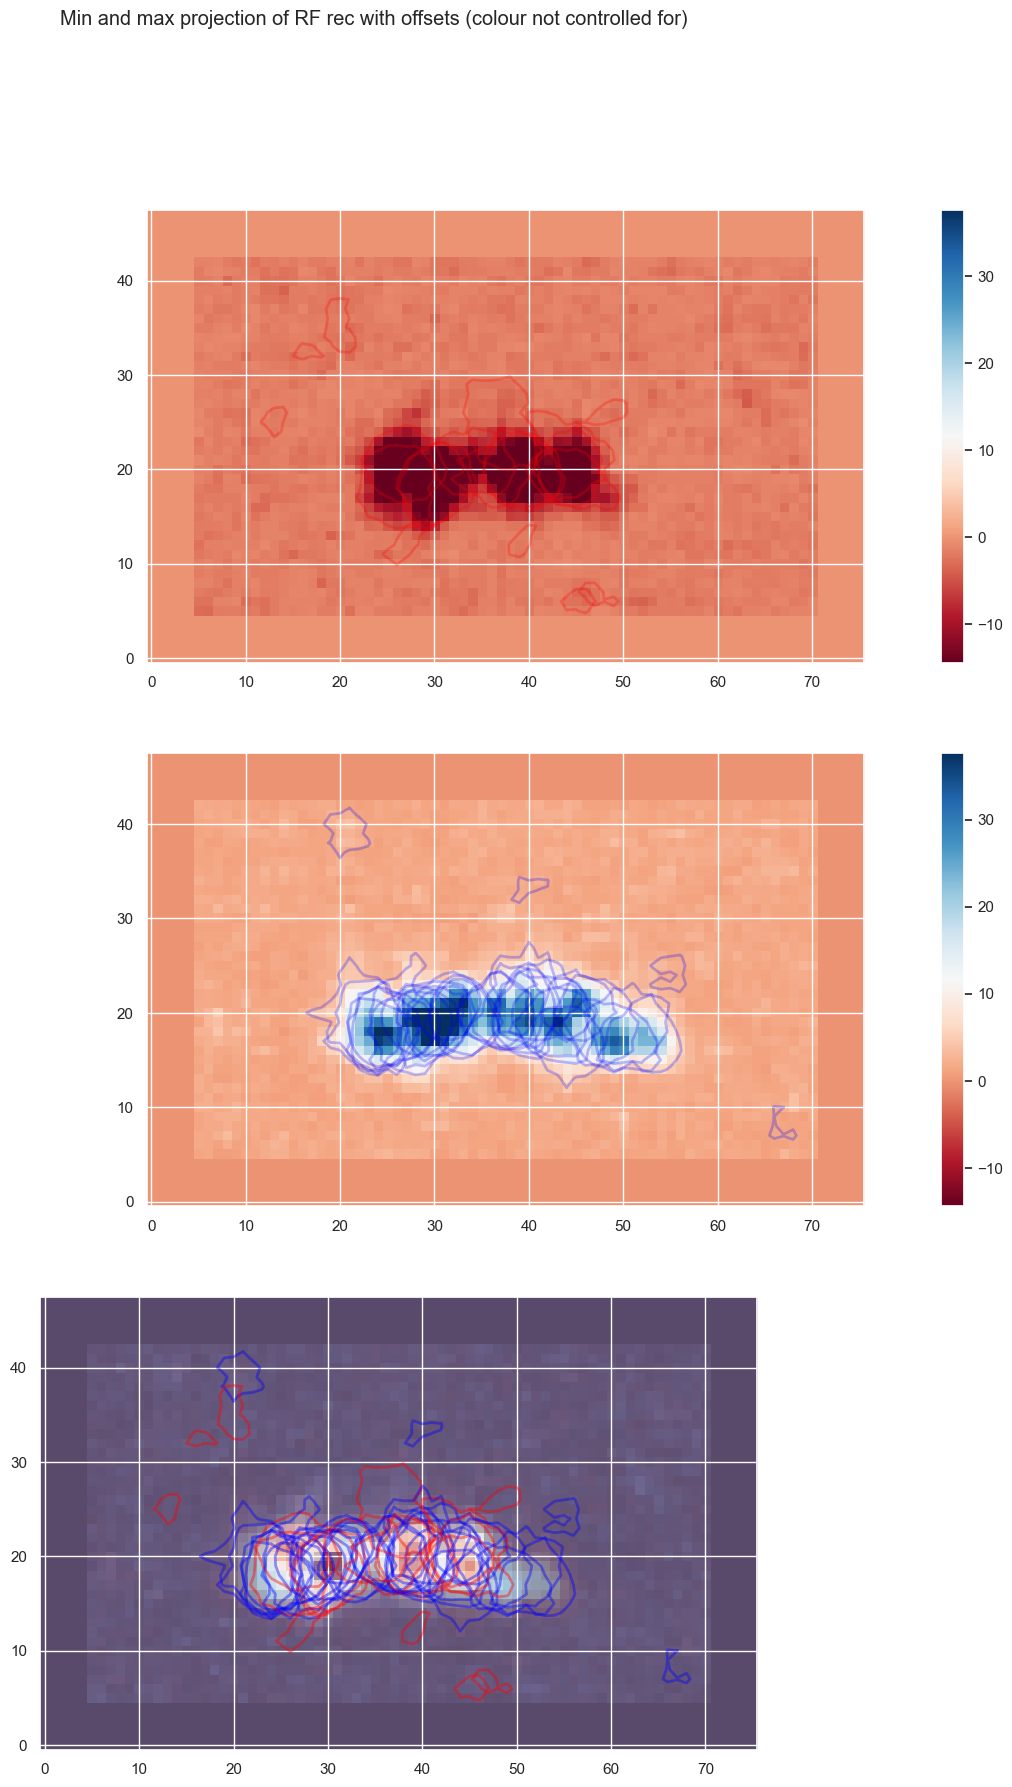

In [21]:
# Kick out empty ish frames 
loadfile = filehandling.load_strf_data(r"D:\Igor analyses\230502\2023-5-2_SMP_0_0_SWN_UV_100_0.h5")
absolute_version = np.abs(loadfile.collapse_times())
indeces_to_delete = np.unique(np.where(np.max(absolute_version, axis = (1,2)) < 5)[0]) # filtering criteria based on amplitudes
cleaned_version = np.delete(loadfile.collapse_times(), indeces_to_delete, axis = 0)
print(cleaned_version.shape)
# Kick out contours accordingly 
contours = loadfile.contours
cleaned_contours = list(np.delete(np.array(loadfile.contours, dtype = "object"), indeces_to_delete, axis = 0))
print(len(cleaned_contours))

# Make projectsion 
min_projection = np.min(cleaned_version, axis = 0) 
max_projection = np.max(cleaned_version, axis = 0)
min_val = np.min(min_projection + 75)
max_val = np.max(max_projection - 75)

# create plot 
fig, ax = plt.subplots(3, 1, figsize = (20, 20))
cmap_modifier = 200
# Plot projections
minproj = ax[0].imshow(min_projection, cmap = 'RdBu', origin = "lower")
minproj.set_clim(min_val, max_val)
plt.colorbar(minproj, ax = ax[0])
# Plot the other projection
maxproj = ax[1].imshow(max_projection, cmap = 'RdBu', origin = "lower")
maxproj.set_clim(min_val, max_val)
plt.colorbar(maxproj, ax = ax[1])
# Plot their combination
combined2 = ax[2].imshow(min_projection, cmap = 'RdBu', alpha = 0.66, origin = "lower")
combined = ax[2].imshow(max_projection, cmap = 'RdBu', alpha = 0.33, origin = "lower")
# combined.set_clim(val_tup)
# combined2.set_clim(val_tup)

# Finally plot contours accordingly
for i in cleaned_contours:
    upper, lower = i
    if len(upper) != 0:
        for contour_up in upper:
            ax[0].plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = 'red', alpha = .25)# contour
            ax[2].plot(contour_up[:, 1], contour_up[:, 0], lw = 2, c = 'red', alpha = .4)# contour
    if len(lower) != 0:
        for contour_low in lower:
            ax[1].plot(contour_low[:, 1], contour_low[:, 0], lw = 2, c = 'blue', alpha = .25)# contour
            ax[2].plot(contour_low[:, 1], contour_low[:, 0], lw = 2, c = 'blue', alpha = .4)# contour
# ax[3].imshow(np.average(load.images, axis = 0), cmap = 'Greys_r', origin = "lower")
# plt.savefig(r"C:\Users\SimenLab\OneDrive\Universitet\PhD\Conferences\Life Sciences PhD Careers Symposium 2023\RF_tiling.svg")
plt.suptitle("Min and max projection of RF rec with offsets (colour not controlled for)")